# **CSCE 5218 / CSCE 4930 Deep Learning**

# **The Perceptron** (20 pt)


In [1]:
# Get the datasets
!!/usr/bin/curl --output test.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/test.txt
!!/usr/bin/curl --output train.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/train.txt


['  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current',
 '                                 Dload  Upload   Total   Spent    Left  Speed',
 '',
 '  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0',
 '100 11645  100 11645    0     0  32200      0 --:--:-- --:--:-- --:--:-- 32257']

In [2]:
# Take a peek at the datasets
!head train.dat
!head test.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13
1	1	1	1	0	0	1	1	0	0	0	1	1	0
0	0	0	1	0	0	1	1	0	1	0	0	1	0
0	1	1	1	0	1	1	1	1	0	0	0	1	0
0	1	1	0	1	0	1	1	1	0	1	0	1	0
0	1	0	0	0	1	0	1	0	1	0	0	1	0
0	1	1	0	0	1	1	1	1	1	1	0	1	0
0	1	1	1	0	0	1	1	0	0	0	1	1	0
0	1	0	0	1	0	0	1	1	0	1	1	1	0
1	1	1	1	0	0	1	1	0	0	0	0	1	0


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this.

In [4]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data


def dot_product(array1, array2):
  dotproduct=0
  for i in range(len(array1)):
      dotproduct+=array1[i]*array2[i]
  return dotproduct


def sigmoid(x):
  return (1/(1+math.exp(-x)))

# The output of the model, which for the perceptron is
# the sigmoid function applied to the dot product of
# the instance and the weights
def output(weight, instance):
    #TODO: return the output of the model
    return sigmoid(dot_product(weight, instance))

# # Predict the label of an instance; this is the definition of the perceptron
# # you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
  return 1 if output(weights, instance) >= 0.5 else 0
    # dotproduct=dot_product(weights,instance)
    # return sigmoid(dot_product)


# # Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate)
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):

    #weight intialization with zero
    weights = [0] * (len(instances[0])-1)
    for _ in range(epochs):
        for instance in instances:
            in_value = dot_product(weights, instance)
            output = sigmoid(in_value)
            error = instance[-1] - output
            # Update weights using gradient descent
            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i]
            # print(in_value)

    return weights

## Run it

In [5]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)

print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```


# Answer:
The first code train_preceptron in which sigmoid output is converted probability like function which is used to compute the error for proper gradient descent updates and for the weight updation
In the second code the output is converted into 1 or 0 using the threshold which is not a way to update the weights where instance[-1]-output becomes discrete(-1,0,1)




### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above)
# **For ploting the line plots**
```
import matplotlib.pyplot as plt


def plot_results(results, tr_percent, num_epochs, lr_array):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
    
    for i, lr in enumerate(lr_array):
        ax = axes[i]
        for tr_size in tr_percent:
            subset = [res['Accuracy'] for res in results if res['tr'] == tr_size and res['epochs'] in num_epochs and res['learning_rate'] == lr]
            ax.plot(num_epochs, subset, marker='o', label=f"tr: {tr_size}%")
        
        ax.set_title(f"Learning Rate: {lr}")
        ax.set_xlabel("Epochs")
        ax.set_ylabel("Accuracy")
        ax.legend()
    
    plt.tight_layout()
    plt.show()
```
Code with different hyperparameters

```
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate
accuracy_lr=[]
for lr in lr_array:
  for tr_size in tr_percent:
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
      accuracy_lr.append({'tr': tr_size, 'epochs':   epochs, 'learning_rate': lr, 'Accuracy': accuracy})
      
plot_results(accuracy_lr,tr_percent,num_epochs,lr_array)
```

# **output:**
```
#tr: 20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 200, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 200, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 200, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 67.0
#tr: 200, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 74.0
#tr: 300, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 300, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 300, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 300, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 74.0
#tr: 300, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 78.0
#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 400, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 400, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 69.0
#tr: 400, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 73.0
#tr: 400, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 77.0
#tr: 20, epochs:   5, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  10, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  20, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  50, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:   5, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  10, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  20, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  50, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:   5, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  10, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  20, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  50, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:   5, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 200, epochs:  10, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 200, epochs:  20, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 200, epochs:  50, learning rate: 0.010; Accuracy (test, 100 instances): 74.0
#tr: 200, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 78.0
#tr: 300, epochs:   5, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 300, epochs:  10, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 300, epochs:  20, learning rate: 0.010; Accuracy (test, 100 instances): 70.0
#tr: 300, epochs:  50, learning rate: 0.010; Accuracy (test, 100 instances): 78.0
#tr: 300, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 80.0
#tr: 400, epochs:   5, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 400, epochs:  10, learning rate: 0.010; Accuracy (test, 100 instances): 69.0
#tr: 400, epochs:  20, learning rate: 0.010; Accuracy (test, 100 instances): 70.0
#tr: 400, epochs:  50, learning rate: 0.010; Accuracy (test, 100 instances): 77.0
#tr: 400, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 80.0
#tr: 20, epochs:   5, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  10, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  50, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs: 100, learning rate: 0.050; Accuracy (test, 100 instances): 64.0
#tr: 40, epochs:   5, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  10, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  50, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 40, epochs: 100, learning rate: 0.050; Accuracy (test, 100 instances): 69.0
#tr: 100, epochs:   5, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  10, learning rate: 0.050; Accuracy (test, 100 instances): 67.0
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 70.0
#tr: 100, epochs:  50, learning rate: 0.050; Accuracy (test, 100 instances): 74.0
#tr: 100, epochs: 100, learning rate: 0.050; Accuracy (test, 100 instances): 77.0
#tr: 200, epochs:   5, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  10, learning rate: 0.050; Accuracy (test, 100 instances): 77.0
#tr: 200, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 78.0
#tr: 200, epochs:  50, learning rate: 0.050; Accuracy (test, 100 instances): 78.0
#tr: 200, epochs: 100, learning rate: 0.050; Accuracy (test, 100 instances): 76.0
#tr: 300, epochs:   5, learning rate: 0.050; Accuracy (test, 100 instances): 74.0
#tr: 300, epochs:  10, learning rate: 0.050; Accuracy (test, 100 instances): 78.0
#tr: 300, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 79.0
#tr: 300, epochs:  50, learning rate: 0.050; Accuracy (test, 100 instances): 78.0
#tr: 300, epochs: 100, learning rate: 0.050; Accuracy (test, 100 instances): 77.0
#tr: 400, epochs:   5, learning rate: 0.050; Accuracy (test, 100 instances): 69.0
#tr: 400, epochs:  10, learning rate: 0.050; Accuracy (test, 100 instances): 76.0
#tr: 400, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 80.0
#tr: 400, epochs:  50, learning rate: 0.050; Accuracy (test, 100 instances): 80.0
#tr: 400, epochs: 100, learning rate: 0.050; Accuracy (test, 100 instances): 80.0
```
# **Output of line chart:**
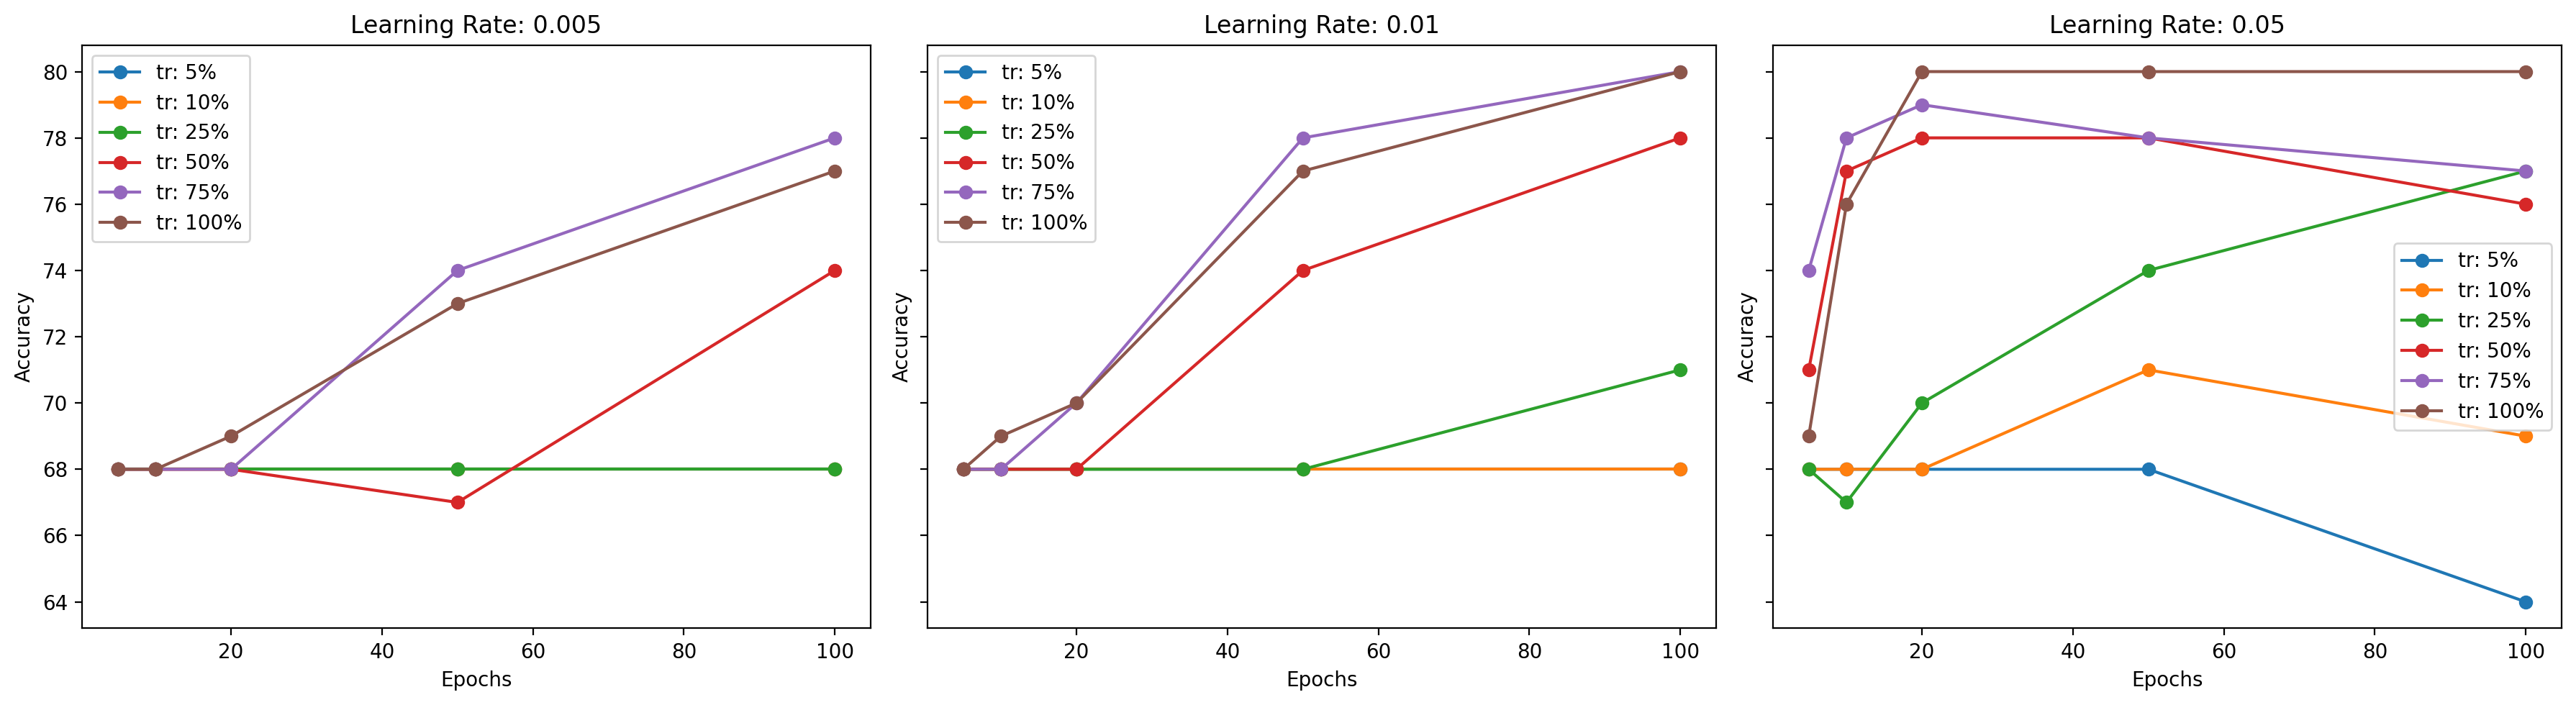


#tr: 20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  20, lea

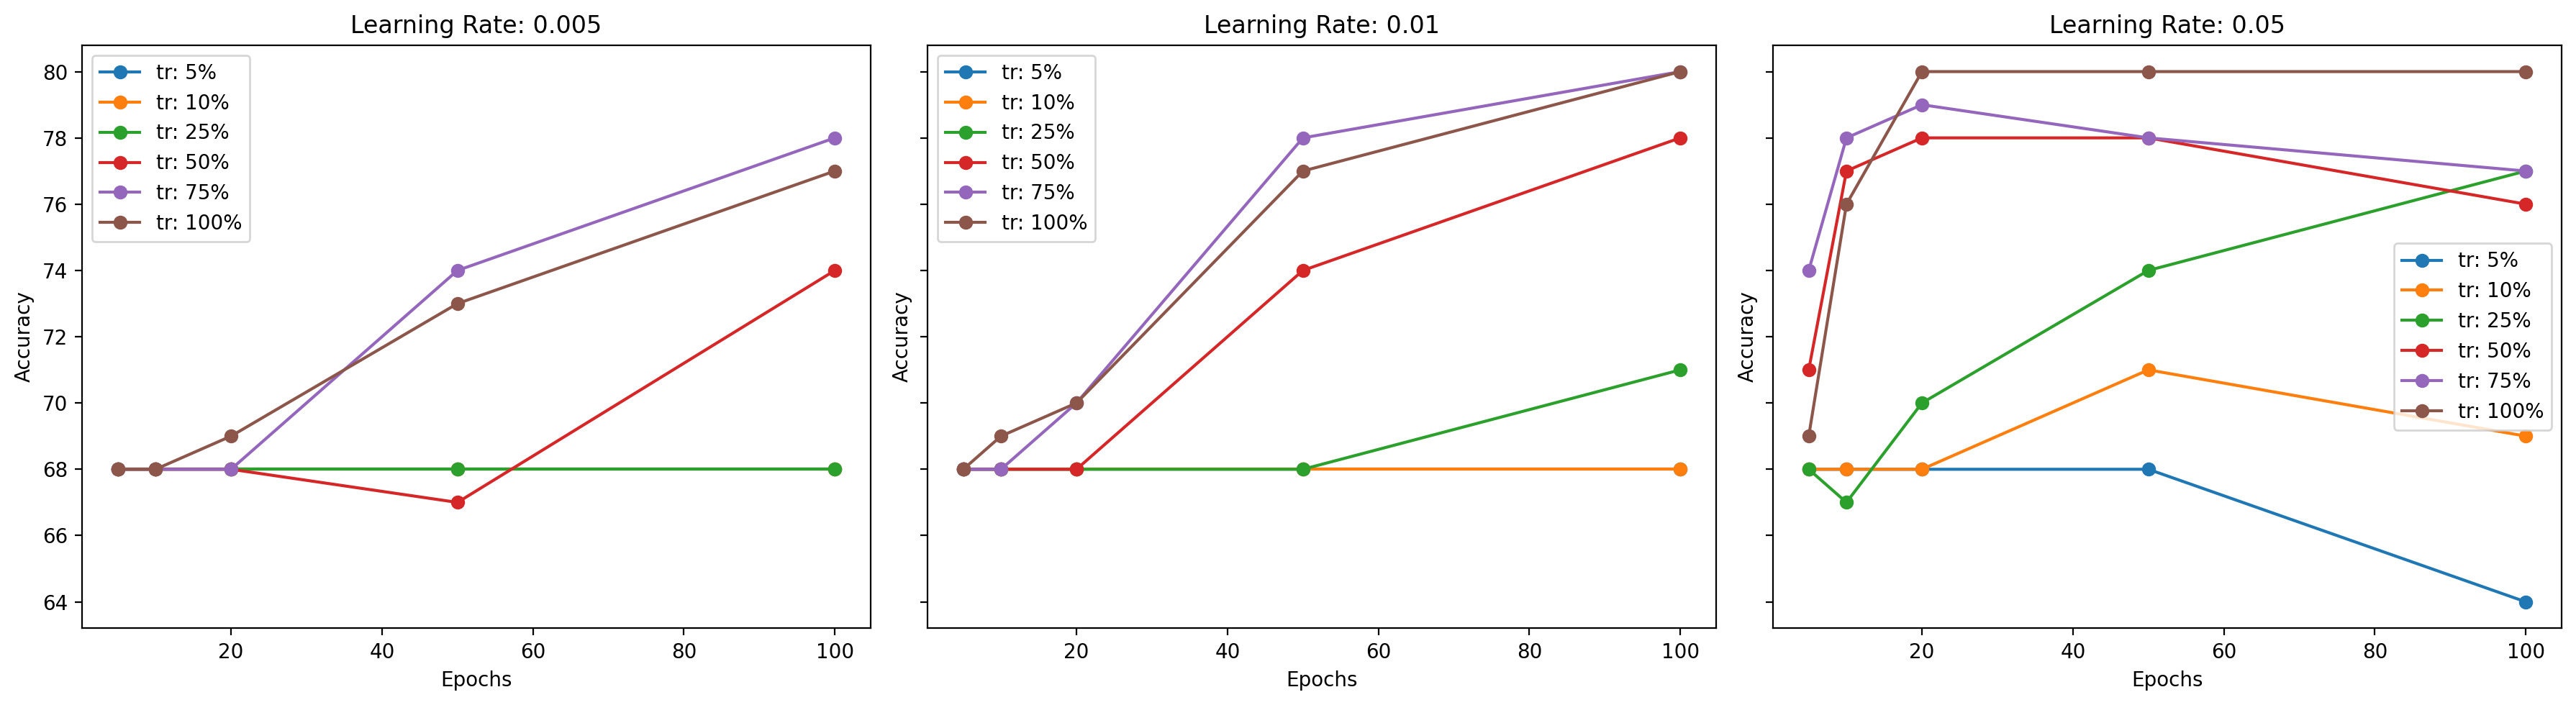

In [60]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate
accuracy_lr=[]
for lr in lr_array:
  for tr_size in tr_percent:
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
      accuracy_lr.append({'tr': tr_size, 'epochs':   epochs, 'learning_rate': lr, 'Accuracy': accuracy})
      print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")
plot_results(accuracy_lr,tr_percent,num_epochs,lr_array)

In [58]:
import matplotlib.pyplot as plt


def plot_results(results, tr_percent, num_epochs, lr_array):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

    for i, lr in enumerate(lr_array):
        ax = axes[i]
        for tr_size in tr_percent:
            subset = [res['Accuracy'] for res in results if res['tr'] == tr_size and res['epochs'] in num_epochs and res['learning_rate'] == lr]
            ax.plot(num_epochs, subset, marker='o', label=f"tr: {tr_size}%")

        ax.set_title(f"Learning Rate: {lr}")
        ax.set_xlabel("Epochs")
        ax.set_ylabel("Accuracy")
        ax.legend()

    plt.tight_layout()
    plt.show()

In [83]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

for lr in lr_array:
  for tr_size in tr_percent:
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
      print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  20, lea

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)



# **Answer:**

A. Training with all train dataset will not give the highest accuracy every time, but the different parameters also effect the accuracy like learning rate and epochs etc. by which the model should be trained well tuned.


B. where the first instance the model is trained with the training size of 100 and learning_rate 0.050 which yield 71% whereas the training size of 200 and learning_rate 0.005 which yield 68% because the model can be stuck in the local minima with lower learning rate inspite of having more data. where the learning rate is higher reduces the chances of stucking in the local minima and it caused the higher accuracy

C.we can get higher accuracy with additional hyperparameters by adjusting the learning rate, using different optimizer and using feature engineering techniques and using regularization

D. where every time training with different epochs is not that much worthy because at a certain point the model is well trained and the accuracy will not be improved where as it leads to the overfitting.
